# US Permanent Visa Applications

## Dataset
Public Disclosure File: Permanent labor certification program (PERM)
Federal Fiscal Year: 2018
Reporting Period: October 1, 2017, through September 30, 2018

A permanent labor certification issued by the Department of Labor (DOL) allows an employer to hire a foreign worker to work permanently in the United States. The disclosure file contains administrative data from employers’ Applications for Permanent Employment Certification (ETA Form 9089) and certification determinations, where the date of the determination was issued on or after October 1, 2017, and on or before September 30, 2018. The data are available from the US Department of Labor and its [Office of Foreign Labor Certification Performance Data](https://www.foreignlaborcert.doleta.gov/performancedata.cfm#dis). The original excel file was tranformed to csv file for faster data processing.

## Project
The dataset has many features which provides lots of information related to foreign employment, salary level of different occupations, different industries and etc. Due to large amount of information, it's hard to find useful information very easily, this project aims to provide readily visualization of the dataset to let people finding useful information. The interactive data visaulization offers analysis from three aspects: individual empolyee, industry and state. This part is related to the exploratory data anlysis. The next part is prediction model to predict the application status or wage. 
The final project is a web-based interactive data visualization application about PERM application to help people find desired information and as well as provide prediction services.The larger scope of the project is to include other visa application data, which can provide more general and detailed analysis about foreign labor conditions in the U.S.

The preliminary results of the project is shown bellow. 

###  Exploratory data anlysis

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,18)})

df = pd.read_csv('PERM_Disclosure_Data_FY2018_Q4_EOY.csv')
print('Number of cases: ', len(df))
df.sample(5)

Number of cases:  119776


,﻿CASE_NUMBER,DECISION_DATE,CASE_STATUS,CASE_RECEIVED_DATE,REFILE,ORIG_FILE_DATE,ORIG_CASE_NO,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FW_INFO_TRAINING_COMP,FW_INFO_REQ_EXPERIENCE,FW_INFO_ALT_EDU_EXPERIENCE,FW_INFO_REL_OCCUP_EXP,PREPARER_INFO_EMP_COMPLETED,PREPARER_INFO_TITLE,EMPLOYER_DECL_INFO_TITLE,NAICS_US_CODE,NAICS_US_TITLE,PW_JOB_TITLE_9089
56036,A-17249-83884,5/8/2018,Certified,12/29/2017,N,NaN,NaN,N,A2Z DEVELOPMENT CENTER; INC.,20450 STEVENS CREEK BLVD,...,A,N,A,Y,N,Associate Attorney,Immigration Specialist,454111,Electronic Shopping,Computer Systems Analysts
41109,A-17305-05835,4/2/2018,Certified-Expired,11/2/2017,N,NaN,NaN,N,8K MILES HEALTH CLOUD INC,5000 LEGACY DR.,...,A,A,Y,A,Y,NaN,HR Manager,541511,Custom Computer Programming Services,Computer Systems Analyst
37355,A-17285-98063,3/21/2018,Certified-Expired,10/12/2017,N,NaN,NaN,N,LM 2 LLC D/B/A LIFE MATTERS,7531 LEESBURG PIKE,...,A,A,A,A,N,Attorney,Director of Human Resources,6216,Home Health Care Services,Home Health Aide
44544,A-18075-53386,4/11/2018,Withdrawn,4/10/2018,N,NaN,NaN,N,XTGLOBAL;INC,2701 DALLAS PARKWAY,...,A,N,A,Y,N,Attorney,Assistant HR Manager,541511,Custom Computer Programming Services,Computer Systems Analysts
16746,A-17075-14541,12/21/2017,Certified-Expired,4/4/2017,N,NaN,NaN,N,Multistar Business Inc. dba Stop N Joy,6303 Hwy 6,...,A,Y,A,Y,N,Attorney at Law,President,447110,Gasoline Stations with Convenience Stores,First-Line Supervisors of Retail Sales Workers


In [2]:
columns = ['CASE_STATUS', 'PW_AMOUNT_9089','DECISION_DATE', 'CASE_RECEIVED_DATE','PW_SOC_TITLE', 'COUNTRY_OF_CITIZENSHIP'
           ,'JOB_INFO_EDUCATION', 'JOB_INFO_EXPERIENCE','JOB_INFO_WORK_STATE','EMPLOYER_STATE']
sub_df = df[columns]
# sub_df.dtypes
sub_df.isnull().sum()

CASE_STATUS                 0
PW_AMOUNT_9089             42
DECISION_DATE               0
CASE_RECEIVED_DATE          0
PW_SOC_TITLE              112
COUNTRY_OF_CITIZENSHIP     11
JOB_INFO_EDUCATION          9
JOB_INFO_EXPERIENCE         4
JOB_INFO_WORK_STATE        15
EMPLOYER_STATE              8
dtype: int64

In [3]:
count_job = pd.DataFrame({'COUNT' : df.groupby( [ 'CASE_STATUS','PW_SOC_TITLE'] ).size()}).reset_index()
count_job = count_job.pivot(index ='PW_SOC_TITLE', columns = 'CASE_STATUS', values = 'COUNT').reset_index()
count_job = count_job.fillna(0)
count_job['TOTAL'] = count_job['Certified']+ count_job['Certified-Expired'] + count_job['Denied'] +count_job['Withdrawn']
count_job = count_job.sort_values('TOTAL', ascending = False)
count_job.iloc[:,2:] = count_job.iloc[:,2:].astype(int) 
count_job_top = count_job[:10]
# print(count_job_top.head(5))
count_job['percentage'] = count_job['TOTAL'] / count_job['TOTAL'].sum() * 100
count_job['percentage'] = count_job['percentage'].map('{:,.1f}%'.format)
text=count_job['percentage']

d1 = go.Bar(x=count_job_top['PW_SOC_TITLE'],
            y=count_job_top['Certified'],name="Certified",)
d2 = go.Bar(x=count_job_top["PW_SOC_TITLE"],
            y=count_job_top["Certified-Expired"],name="Certified-Expired")
d3 = go.Bar(x=count_job_top["PW_SOC_TITLE"],
            y=count_job_top["Denied"],name="Denied")
d4 = go.Bar(x=count_job_top["PW_SOC_TITLE"],
            y=count_job_top["Withdrawn"],name="Withdrawn")

data = [d1, d2, d3, d4]
layout = go.Layout(dict(title= "Number of cases for top 10 occupations",
                        yaxis=dict(title="Number of cases"),barmode='stack'))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

count_job_top = count_job[:20]
num = count_job['TOTAL'].iloc[51:].sum()
labels = list(count_job_top['PW_SOC_TITLE'])
labels.append('Others')
values = list(count_job_top['TOTAL'])
values.append(num)
trace = go.Pie(labels=labels, values=values)
layout = go.Layout(dict(title= "Occupations"))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [4]:
# print(df['PW_UNIT_OF_PAY_9089'].unique())
# print(df.groupby(['PW_UNIT_OF_PAY_9089']).describe()['PW_AMOUNT_9089'])
df['PW_AMOUNT_9089'] = pd.to_numeric(df['PW_AMOUNT_9089'], errors='coerce')
df['Pay'] = df['PW_UNIT_OF_PAY_9089']
df['Pay'][df['PW_UNIT_OF_PAY_9089'] == 'Year'] = 1
df['Pay'][df['PW_UNIT_OF_PAY_9089'] == 'Month'] = 12
df['Pay'][df['PW_UNIT_OF_PAY_9089'] == 'Bi-Weekly'] = 26
df['Pay'][df['PW_UNIT_OF_PAY_9089'] == 'Week'] = 52
df['Pay'][df['PW_UNIT_OF_PAY_9089'] == 'Hour'] = 2000
df['Pay'] = df['Pay'] * df['PW_AMOUNT_9089']
df[['PW_SOC_TITLE','PW_AMOUNT_9089','PW_UNIT_OF_PAY_9089']] = df[['PW_SOC_TITLE','PW_AMOUNT_9089','PW_UNIT_OF_PAY_9089']].dropna()


pay_mean = df['Pay'].mean()
layout = dict(title = 'Prevailing wage for top 15 major occupations',
              yaxis = dict(range = [100, 250000],
                       title =  'Prevailing wage'
                ),
             shapes= [{
              'type' :'line',
              'x0': -0.5,
              'y0': pay_mean,
              'x1': 15,
              'y1': pay_mean,
              'line': { 'dash': 'dashdot'}
               }]
             )


job_lists = count_job[:15]
data = [{
    'y': df.loc[df.PW_SOC_TITLE == job]['Pay'], 
    'type':'violin',
    'name' : job,
    'box': {
            "visible": True
            },
    'meanline': {
                'visible': True
            },
    'showlegend':False,     
    } for i,job in enumerate(job_lists['PW_SOC_TITLE'])]

# print(data[0])
data1 = []
for i in range(len(data)):
    data1.append(data[i])

# fig = go.Figure(data=data1, layout=layout)
fig = dict(data=data,layout=layout)
iplot(fig)

In [6]:
count=pd.DataFrame({'COUNT' : df.groupby(['CASE_STATUS','JOB_INFO_WORK_STATE']).size()}).reset_index()

df['JOB_INFO_WORK_STATE'] = df['JOB_INFO_WORK_STATE'].dropna()
count= count.pivot(index ='JOB_INFO_WORK_STATE', columns = 'CASE_STATUS', values = 'COUNT').reset_index()
count = count.fillna(0)
count[['Certified', 'Certified-Expired', 'Denied','Withdrawn']] = count[['Certified','Certified-Expired',
                                                                         'Denied','Withdrawn']].astype(int) 
count['TOTAL'] = count['Certified'] + count['Certified-Expired'] + count['Denied'] +count['Withdrawn']
count['Certified Percentage'] = (count['Certified'] + count['Certified-Expired']) / count['TOTAL'] * 100
count['Certified Percentage'] = count['Certified Percentage'].map('{:,.1f}%'.format)
citizen= df.groupby(['JOB_INFO_WORK_STATE'])['COUNTRY_OF_CITIZENSHIP'].apply(lambda x:\
                                                                               x.value_counts().index[0]).reset_index()
industry= df.groupby(['JOB_INFO_WORK_STATE'])['NAICS_US_TITLE'].apply(lambda x:\
                                                                               x.value_counts().index[0]).reset_index()
company= df.groupby(['JOB_INFO_WORK_STATE'])['EMPLOYER_NAME'].apply(lambda x:\
                                                                               x.value_counts().index[0]).reset_index()

count = pd.merge(count, citizen,on='JOB_INFO_WORK_STATE')
count = pd.merge(count, industry,on='JOB_INFO_WORK_STATE')
count = pd.merge(count, company,on='JOB_INFO_WORK_STATE')

count['text'] = 'Certified: ' + count['Certified'].astype(str) +  '<br>' + 'Certified-Expired: ' +\
                 count['Certified-Expired'].astype(str) +  '<br>' +'Denied: ' +\
                 count['Denied'].astype(str) +  '<br>' +'Withdrawn: ' + count['Withdrawn'].astype(str) +'<br>' +\
                 'Certified Percentage: ' + count['Certified Percentage'] +'<br>'+'Top1 Citizienship: ' + count['COUNTRY_OF_CITIZENSHIP']+\
                 '<br>' + 'Top1 Industry: ' + count['NAICS_US_TITLE'] + '<br>' + 'Top1 Employer: ' + count['EMPLOYER_NAME']

scl = [[0.0, 'rgb(242,240,247)'],[1.0, 'rgb(84,39,143)']]    
data=[dict(
    type ='choropleth',
    colorscale = scl,
    locations = count['JOB_INFO_WORK_STATE'],
    z = count['TOTAL'],
    text = count['text'],
    locationmode = 'USA-states',
    marker = dict(
            line = dict(color = 'rgb(255,255,255)',
                        width = 2)),
    colorbar = dict(title = 'Number of applications')
    )]

layout= dict(title = 'Number of applications and results in different states', geo = dict(
            scope = 'usa',
            projection = dict(type='albers usa'),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
            )
fig = dict(data=data, layout=layout)
iplot(fig)



In [7]:
df['AGENT_FIRM_NAME'] = df['AGENT_FIRM_NAME'].dropna()
count_agent = pd.DataFrame({'COUNT' : df.groupby( [ 'CASE_STATUS','AGENT_FIRM_NAME'] ).size()}).reset_index()
count_agent = count_agent.pivot(index ='AGENT_FIRM_NAME', columns = 'CASE_STATUS', values = 'COUNT').reset_index()
count_agent = count_agent.fillna(0)
count_agent['TOTAL'] = count_agent['Certified']+ count_agent['Certified-Expired'] + count_agent['Denied'] +count_agent['Withdrawn']
count_agent = count_agent.sort_values('TOTAL', ascending = False)
count_agent.iloc[:,2:] = count_agent.iloc[:,2:].astype(int) 
count_agent_top = count_agent[:10]
# print(count_job_top.head(5))


d1 = go.Bar(x= count_agent_top['AGENT_FIRM_NAME'],
            y= count_agent_top['Certified'], name='Certified')
d2 = go.Bar(x= count_agent_top['AGENT_FIRM_NAME'],
            y= count_agent_top['Certified-Expired'], name='Certified-Expired')
d3 = go.Bar(x= count_agent_top['AGENT_FIRM_NAME'],
            y= count_agent_top['Denied'], name='Denied')
d4 = go.Bar(x= count_agent_top['AGENT_FIRM_NAME'],
            y= count_agent_top['Withdrawn'], name='Withdrawn')
data = [d1, d2, d3, d4]
layout = go.Layout(dict(title= 'Top 10 most popupar agent firm',
                        yaxis= dict(title='Number of cases'),barmode='stack'))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

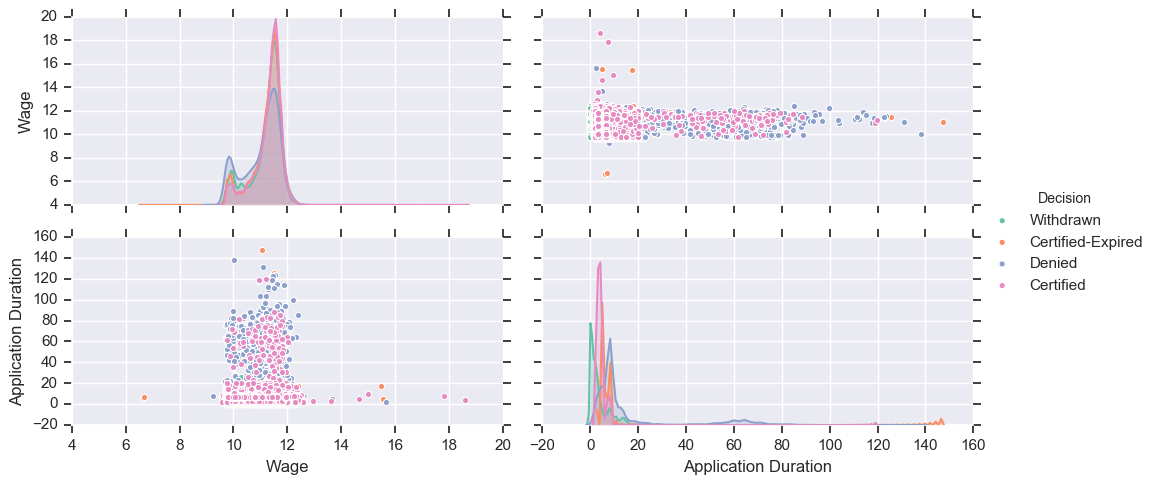

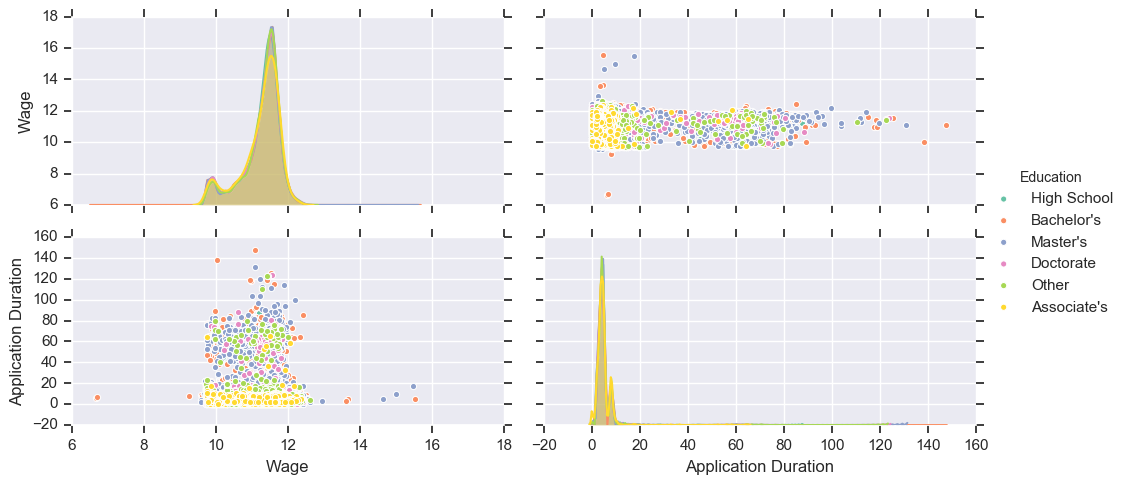

In [5]:
df['CASE_RECEIVED_DATE'] = pd.to_datetime(df['CASE_RECEIVED_DATE'], format='%m/%d/%Y', errors='coerce')
df['DECISION_DATE'] = pd.to_datetime(df['DECISION_DATE'], format='%m/%d/%Y', errors='coerce')
# print(df['FOREIGN_WORKER_INFO_EDUCATION'].unique())
df['FOREIGN_WORKER_INFO_EDUCATION'] = df['FOREIGN_WORKER_INFO_EDUCATION'].replace('None', np.nan)
# print(df['FOREIGN_WORKER_INFO_EDUCATION'].unique())

education = df['FOREIGN_WORKER_INFO_EDUCATION'].dropna()
decision = df['CASE_STATUS'].dropna()
wage = df['Pay'].dropna()
wage = np.array(wage).astype(np.float64) 
df['CASE_PERIOD'] = (df['DECISION_DATE'] - df['CASE_RECEIVED_DATE']).dt.days / 30
period = df['CASE_PERIOD'].dropna()

p = sns.pairplot(pd.DataFrame(list(zip(np.log(wage), period, decision)), 
                              columns=['Wage','Application Duration','Decision']),\
                 hue='Decision', palette='Set2', aspect=2)

p = sns.pairplot(pd.DataFrame(list(zip(np.log(wage), period, education)), 
                              columns=['Wage','Application Duration','Education']),\
                 hue='Education', palette='Set2', aspect=2)


### Prediction Model
Random forests model was used to predict the case status. The original features were remaped to three new features: education level, salary level and working state. The case status was mapped to certified and denied, which is a binary decision problem. Though the model was very simplified due to time limitation, the accuracy is not bad (91%). By selecting/mapping features more carefully and opimizing model parameters, a better prediction model should be generated. 

In [20]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


# print(df['NAICS_US_TITLE'].nunique())
df = pd.read_csv('PERM_Disclosure_Data_FY2018_Q4_EOY.csv')
# print('Number of cases: ', len(df))
df.sample(5)

df['PW_AMOUNT_9089'] = pd.to_numeric(df['PW_AMOUNT_9089'], errors='coerce')
df['Pay'] = df['PW_UNIT_OF_PAY_9089']
df['Pay'][df['PW_UNIT_OF_PAY_9089'] == 'Year'] = 1
df['Pay'][df['PW_UNIT_OF_PAY_9089'] == 'Month'] = 12
df['Pay'][df['PW_UNIT_OF_PAY_9089'] == 'Bi-Weekly'] = 26
df['Pay'][df['PW_UNIT_OF_PAY_9089'] == 'Week'] = 52
df['Pay'][df['PW_UNIT_OF_PAY_9089'] == 'Hour'] = 2000
df['Pay'] = df['Pay'] * df['PW_AMOUNT_9089']

df['New Pay'] = df['Pay'] / 60000
df['New Pay'][df['New Pay'] < 1] = 1
df['New Pay'][(df['New Pay'] >= 1) & (df['New Pay'] < 2)] = 2
df['New Pay'][(df['New Pay'] >= 2) & (df['New Pay'] < 3)] = 3
df['New Pay'][(df['New Pay'] >= 3) & (df['New Pay'] < 4)] = 4
df['New Pay'][(df['New Pay'] >= 4) & (df['New Pay'] < 5)] = 5
df['New Pay'][(df['New Pay'] >= 5)] = 6

# print(df['CASE_STATUS'].head(5))
df.CASE_STATUS[(df['CASE_STATUS']=='Withdrawn') | (df['CASE_STATUS']=='Denied') ] = 0
df.CASE_STATUS[(df['CASE_STATUS']=='Certified-Expired') | (df['CASE_STATUS']=='Certified')] = 1
# print(df['CASE_STATUS'].unique())
# data_set = df[['New Pay', 'FOREIGN_WORKER_INFO_EDUCATION', 'JOB_INFO_WORK_STATE','CASE_STATUS']].copy()
data_set = df[['New Pay', 'JOB_INFO_WORK_STATE','CASE_STATUS']].copy()
data_set.dropna(how='any', inplace=True)
print(data_set.head(5))
print('Size of data: ',len(data_set))

data_set = data_set.apply(lambda x: x.astype('category'))
X = data_set.drop('CASE_STATUS', axis=1)
y = data_set['CASE_STATUS']
X_encode = pd.get_dummies(X)
X = X_encode.as_matrix()
y = y.as_matrix()


clf = RandomForestClassifier(n_estimators=50, max_depth=15, min_samples_split=3, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print('The cross validation score is: ', scores.mean())
print("Accuracy: %0.2f (+/- %0.0f)" % (scores.mean(), scores.std() * 2))

  New Pay JOB_INFO_WORK_STATE CASE_STATUS
0       6                  FL           0
1       6                  NJ           0
2       6                  TX           0
3       6                  TX           0
4       6                  CA           0
Size of data:  119713
The cross validation score is:  0.914963286113
Accuracy: 0.91 (+/- 0)
